<a href="https://colab.research.google.com/github/sbhardwaj97/employee-turnover-/blob/master/project_work_module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step -1
import the required files and package


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url="https://raw.githubusercontent.com/sbhardwaj97/employee-turnover-/master/HR_comma_sep.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#step-2
Data  cleaning<br>
Dataset used here is already clean 



In [5]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [6]:
for col in df.columns:
  print(col, " : ",len(df[col].unique()),'labels')

satisfaction_level  :  92 labels
last_evaluation  :  65 labels
number_project  :  6 labels
average_montly_hours  :  215 labels
time_spend_company  :  8 labels
Work_accident  :  2 labels
left  :  2 labels
promotion_last_5years  :  2 labels
Department  :  10 labels
salary  :  3 labels



#step-3
Dealing with Text-Data<br>
Two types of categorical data<br>
Label Encoding<br>
Ordinal Encoding


In [7]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [8]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Applying Label encoding

In [9]:
emp=pd.get_dummies(df,columns=['Department'],drop_first=True)

In [10]:
emp.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


Move the variable "left" to the back of the table

In [11]:
last=emp['left']
emp.drop(labels=['left'],axis=1,inplace=True)
emp.insert(0,'left',last)
emp.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1,0.38,0.53,2,157,3,0,0,low,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,0,medium,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,0,0,medium,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,low,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,low,0,0,0,0,0,0,1,0,0


Applying ordinal encoding

In [12]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [13]:
order_label={"low":1,"medium":2,"high":3}

In [14]:
emp["salary"]=emp["salary"].map(order_label)

In [15]:
emp.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0


In [16]:
emp[emp['salary']==3].head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
72,1,0.45,0.49,2,149,3,0,0,3,0,0,0,0,0,1,0,0,0
111,1,0.09,0.85,6,289,4,0,0,3,0,0,1,0,0,0,0,0,0
189,1,0.44,0.51,2,156,3,0,0,3,0,0,0,0,0,0,0,0,1
267,1,0.45,0.53,2,129,3,0,0,3,0,0,0,0,0,0,0,0,1
306,1,0.37,0.46,2,149,3,0,0,3,0,0,0,0,1,0,0,0,0


#step 4
Train test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
target_name="left"
X = emp.drop('left', axis=1)
y=emp[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [19]:
X_train[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
9838,1.00,0.61,3,188,4,0,0,1,0,0,0,0,0,1,0,0,0
7689,0.16,0.78,4,196,5,0,0,3,0,0,0,0,0,0,0,0,1
6557,0.80,0.80,3,175,2,0,0,2,1,0,0,0,0,0,0,0,0
6872,0.66,0.86,4,112,6,0,0,2,0,1,0,0,0,0,0,0,0
820,0.11,0.93,7,284,4,0,0,1,0,0,0,0,0,0,0,0,1


In [20]:
y_train[:5]

9838    0
7689    0
6557    0
6872    0
820     1
Name: left, dtype: int64

#step 5
<h3>scalling <br>
standardization our data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_train_a=scaler.fit_transform(X_train)

In [23]:
X_train_a[:5]

array([[ 1.55539086, -0.61934644, -0.65341156, -0.2608872 ,  0.34061666,
        -0.41100307, -0.14998935, -0.93520344, -0.23342308, -0.23579555,
        -0.22578001, -0.21283823, -0.24299543,  3.88943289, -0.61810584,
        -0.41542618, -0.47026373],
       [-1.81839394,  0.37200735,  0.15695385, -0.10065248,  1.02407141,
        -0.41100307, -0.14998935,  2.2076354 , -0.23342308, -0.23579555,
        -0.22578001, -0.21283823, -0.24299543, -0.25710689, -0.61810584,
        -0.41542618,  2.12646636],
       [ 0.75210876,  0.48863721, -0.65341156, -0.52126862, -1.02629282,
        -0.41100307, -0.14998935,  0.63621598,  4.2840665 , -0.23579555,
        -0.22578001, -0.21283823, -0.24299543, -0.25710689, -0.61810584,
        -0.41542618, -0.47026373],
       [ 0.18981129,  0.83852678,  0.15695385, -1.78311702,  1.70752615,
        -0.41100307, -0.14998935,  0.63621598, -0.23342308,  4.2409621 ,
        -0.22578001, -0.21283823, -0.24299543, -0.25710689, -0.61810584,
        -0.41542618

In [24]:
#X_train_scale_a=pd.DataFrame(X_train_scale,columns=X_train)
X_train_scale=pd.DataFrame(X_train_a,columns=X_train.columns)

In [25]:
X_train[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
9838,1.00,0.61,3,188,4,0,0,1,0,0,0,0,0,1,0,0,0
7689,0.16,0.78,4,196,5,0,0,3,0,0,0,0,0,0,0,0,1
6557,0.80,0.80,3,175,2,0,0,2,1,0,0,0,0,0,0,0,0
6872,0.66,0.86,4,112,6,0,0,2,0,1,0,0,0,0,0,0,0
820,0.11,0.93,7,284,4,0,0,1,0,0,0,0,0,0,0,0,1


In [26]:
X_train_scale.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1.555391,-0.619346,-0.653412,-0.260887,0.340617,-0.411003,-0.149989,-0.935203,-0.233423,-0.235796,-0.22578,-0.212838,-0.242995,3.889433,-0.618106,-0.415426,-0.470264
1,-1.818394,0.372007,0.156954,-0.100652,1.024071,-0.411003,-0.149989,2.207635,-0.233423,-0.235796,-0.22578,-0.212838,-0.242995,-0.257107,-0.618106,-0.415426,2.126466
2,0.752109,0.488637,-0.653412,-0.521269,-1.026293,-0.411003,-0.149989,0.636216,4.284067,-0.235796,-0.22578,-0.212838,-0.242995,-0.257107,-0.618106,-0.415426,-0.470264
3,0.189811,0.838527,0.156954,-1.783117,1.707526,-0.411003,-0.149989,0.636216,-0.233423,4.240962,-0.22578,-0.212838,-0.242995,-0.257107,-0.618106,-0.415426,-0.470264
4,-2.019214,1.246731,2.588050,1.661929,0.340617,-0.411003,-0.149989,-0.935203,-0.233423,-0.235796,-0.22578,-0.212838,-0.242995,-0.257107,-0.618106,-0.415426,2.126466


In [27]:
(X_train["number_project"]-X_train["number_project"].mean()) / X_train["number_project"].std()

9838    -0.653384
7689     0.156947
6557    -0.653384
6872     0.156947
820      2.587942
           ...   
5191     0.156947
13418    0.156947
5390     0.967279
860      0.156947
7270    -1.463716
Name: number_project, Length: 11999, dtype: float64

<h2> test set standardization

In [28]:
scaler=StandardScaler()
X_test_a=scaler.fit_transform(X_test)

In [29]:
#X_train_scale_a=pd.DataFrame(X_train_scale,columns=X_train)
X_test_scale=pd.DataFrame(X_test_a,columns=X_test.columns)

In [30]:
X_test[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
6723,0.65,0.96,5,226,2,1,0,2,0,0,0,0,1,0,0,0,0
6473,0.88,0.80,3,166,2,0,0,1,0,0,0,0,0,0,0,0,0
4679,0.69,0.98,3,214,2,0,0,1,0,0,0,0,0,0,1,0,0
862,0.41,0.47,2,154,3,0,0,1,0,0,0,0,0,0,1,0,0
7286,0.87,0.76,5,254,2,1,0,1,0,0,1,0,0,0,0,0,0


In [31]:
X_test_scale[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.148858,1.438194,0.986460,0.496987,-1.025552,2.428282,-0.136659,0.635614,-0.242792,-0.217072,-0.234997,-0.195096,3.856555,-0.235785,-0.614852,-0.427199,-0.472221
1,1.079308,0.496351,-0.644053,-0.703014,-1.025552,-0.411814,-0.136659,-0.926090,-0.242792,-0.217072,-0.234997,-0.195096,-0.259299,-0.235785,-0.614852,-0.427199,-0.472221
2,0.310676,1.555924,-0.644053,0.256987,-1.025552,-0.411814,-0.136659,-0.926090,-0.242792,-0.217072,-0.234997,-0.195096,-0.259299,-0.235785,1.626407,-0.427199,-0.472221
3,-0.822046,-1.446199,-1.459309,-0.943014,-0.334790,-0.411814,-0.136659,-0.926090,-0.242792,-0.217072,-0.234997,-0.195096,-0.259299,-0.235785,1.626407,-0.427199,-0.472221
4,1.038854,0.260890,0.986460,1.056987,-1.025552,2.428282,-0.136659,-0.926090,-0.242792,-0.217072,4.255383,-0.195096,-0.259299,-0.235785,-0.614852,-0.427199,-0.472221


#step 6
<h3>Model building 

<h3>Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [33]:
skk=StratifiedKFold(shuffle=True,n_splits=10)
logreg = LogisticRegression()
logreg.fit(X_train_scale, y_train)

LogisticRegression()

In [34]:
score=cross_val_score(logreg,X_train_scale,y_train,cv=skk,scoring='accuracy') # Training score
print(score.mean())

0.7939823463997776


<pre>accuracy is the easiest classification metric to understand
But, it does not tell you the underlying distribution of response values
And, it does not tell you what "types" of errors your classifier is making </pre>

In [35]:
scoretest=cross_val_score(logreg,X_test_scale,y_test,cv=skk,scoring='accuracy') # Testing score
print(scoretest.mean())

0.7963333333333333


confusion matrix

In [36]:
pre=logreg.predict(X_test_scale)

In [37]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual or Truth')
    plt.xlabel('Prediction')

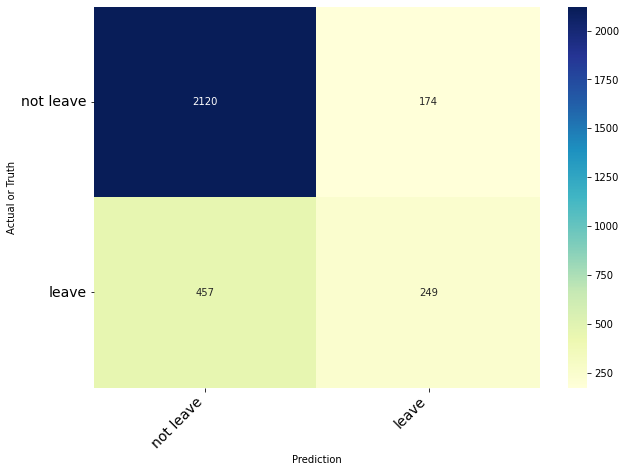

In [38]:
cm = confusion_matrix(y_test,pre)
print_confusion_matrix(cm,["not leave","leave"])

In [39]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.59      0.35      0.44       706

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



<H3>DECISION TREE

In [40]:
treemodel = tree.DecisionTreeClassifier()
skk=StratifiedKFold(shuffle=True,n_splits=10)
treemodel.fit(X_train_scale, y_train)

DecisionTreeClassifier()

In [41]:
score2=cross_val_score(treemodel,X_test_scale,y_test,cv=skk,scoring='accuracy') # Training score
print(score2.mean())

0.961


In [42]:
score3=cross_val_score(treemodel,X_train_scale,y_train,cv=skk,scoring='accuracy') # Training score
print(score3.mean())

0.9801654851264944


In [43]:
pretree=treemodel.predict(X_test_scale)

In [44]:
print(classification_report(y_test,pretree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.94      0.96      0.95       706

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



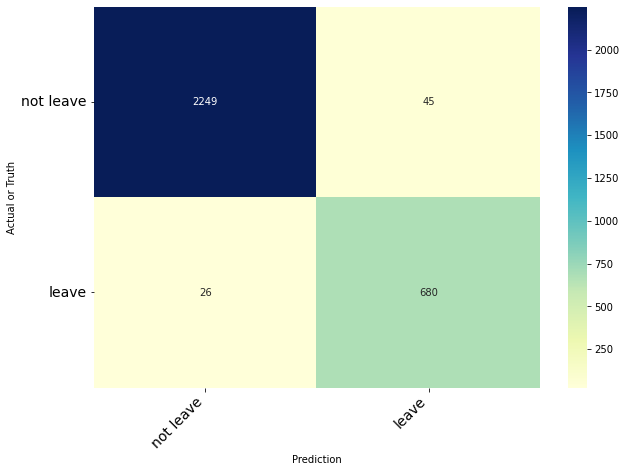

In [45]:
cm = confusion_matrix(y_test,pretree)
print_confusion_matrix(cm,["not leave","leave"])

<h3>Random Forest

In [46]:
rtreemodel = RandomForestClassifier()
rtreemodel.fit(X_train_scale, y_train)

RandomForestClassifier()

In [47]:
rpretree=treemodel.predict(X_test_scale)

In [48]:
print(classification_report(y_test,rpretree))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.94      0.96      0.95       706

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



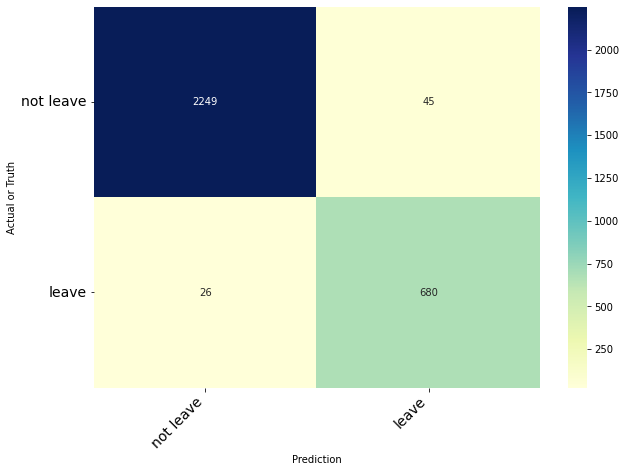

In [49]:
cm = confusion_matrix(y_test,rpretree)
print_confusion_matrix(cm,["not leave","leave"])

In [50]:
svc = svm.SVC()
svc.fit(X_train_scale, y_train)

SVC()

In [51]:
svcpre=svc.predict(X_test_scale)

In [52]:
print(classification_report(y_test,svcpre))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2294
           1       0.90      0.90      0.90       706

    accuracy                           0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



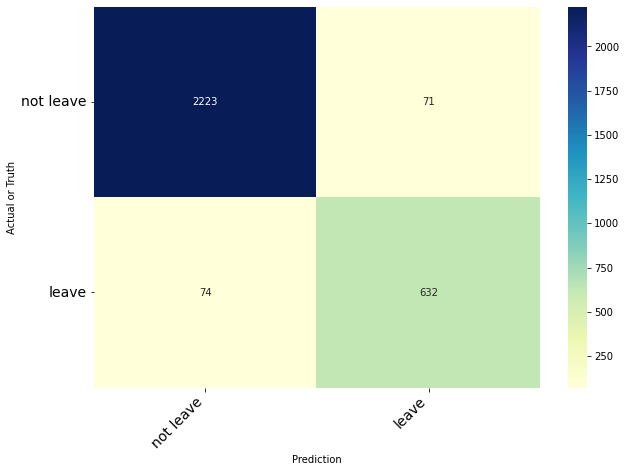

In [53]:
cm = confusion_matrix(y_test,svcpre)
print_confusion_matrix(cm,["not leave","leave"])